In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ppiech/openaigym/spinningup

In [5]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/bipedal-1-9/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/bipedal-1-9/



,Epoch,AverageEpRet,StdEpRet,EpLen,GoalPathLen,StabilityReward,StabilityActionError,StabilityGoalError,ForwardPredictionError,GoalDiscount,...,ActionsClipFrac,ActionsStopIter,LossActionInverse,DeltaLossActionInverse,LossGoalInverse,DeltaLossGoalInverse,Unit,Condition1,Condition2,Performance
0,0,-86.803480,28.321985,411.62500,1.015130,0.360385,0.425008,0.747477,0.524864,0.492188,...,0.18775,71.0,0.435890,-0.464019,0.210825,-0.036173,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-86.803480
1,1,-61.445297,25.694365,767.50000,1.017028,0.357135,0.385325,0.738766,0.432645,0.492188,...,0.16950,50.0,0.382025,-0.057965,0.175540,-0.034930,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-61.445297
2,2,-95.304470,27.875128,306.08334,1.019085,0.340335,0.419552,0.728711,0.393047,0.492188,...,0.12725,21.0,0.345779,-0.037300,0.137047,-0.039143,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-95.304470
3,3,-96.433556,26.870705,270.07144,1.019340,0.314481,0.416280,0.768969,0.364571,0.492188,...,0.18100,42.0,0.313915,-0.028965,0.092574,-0.044039,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-96.433556
4,4,-104.101830,16.118587,164.47826,1.019367,0.315275,0.310556,0.762016,0.349412,0.492188,...,0.23825,63.0,0.289357,-0.027221,0.056608,-0.035698,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-104.101830
5,5,-82.937030,25.903780,471.00000,1.021756,0.323524,0.242364,0.746211,0.252354,0.492188,...,0.17700,37.0,0.264331,-0.023462,0.032090,-0.021969,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-82.937030
6,6,-88.078280,29.067347,384.22223,1.017929,0.314270,0.240369,0.747508,0.229639,0.492188,...,0.16325,31.0,0.249623,-0.019285,0.022669,-0.009725,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-88.078280
7,7,-75.717160,28.101624,623.60000,1.018942,0.309636,0.462812,0.745750,0.192942,0.492188,...,0.18575,37.0,0.251176,-0.007802,0.019737,-0.003800,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-75.717160
8,8,-95.630260,25.211794,282.50000,1.018959,0.327151,0.253810,0.732672,0.213843,0.492188,...,0.24100,51.0,0.236780,-0.014469,0.018389,-0.001591,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-95.630260
9,9,-61.227050,23.545656,768.50000,1.021616,0.349784,0.243500,0.702375,0.158286,0.492188,...,0.22450,59.0,0.234101,-0.009693,0.016964,-0.001167,2,discounts_bipedalwalker-v2,discounts_bipedalwalker-v2-4,-61.227050


In [6]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
#           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch
0,discounts_bipedalwalker-v2,4000
2,reward_shift_bipedalwalker-v2,4000
3,inv_buffer_1_bipedalwalker-v2,4000


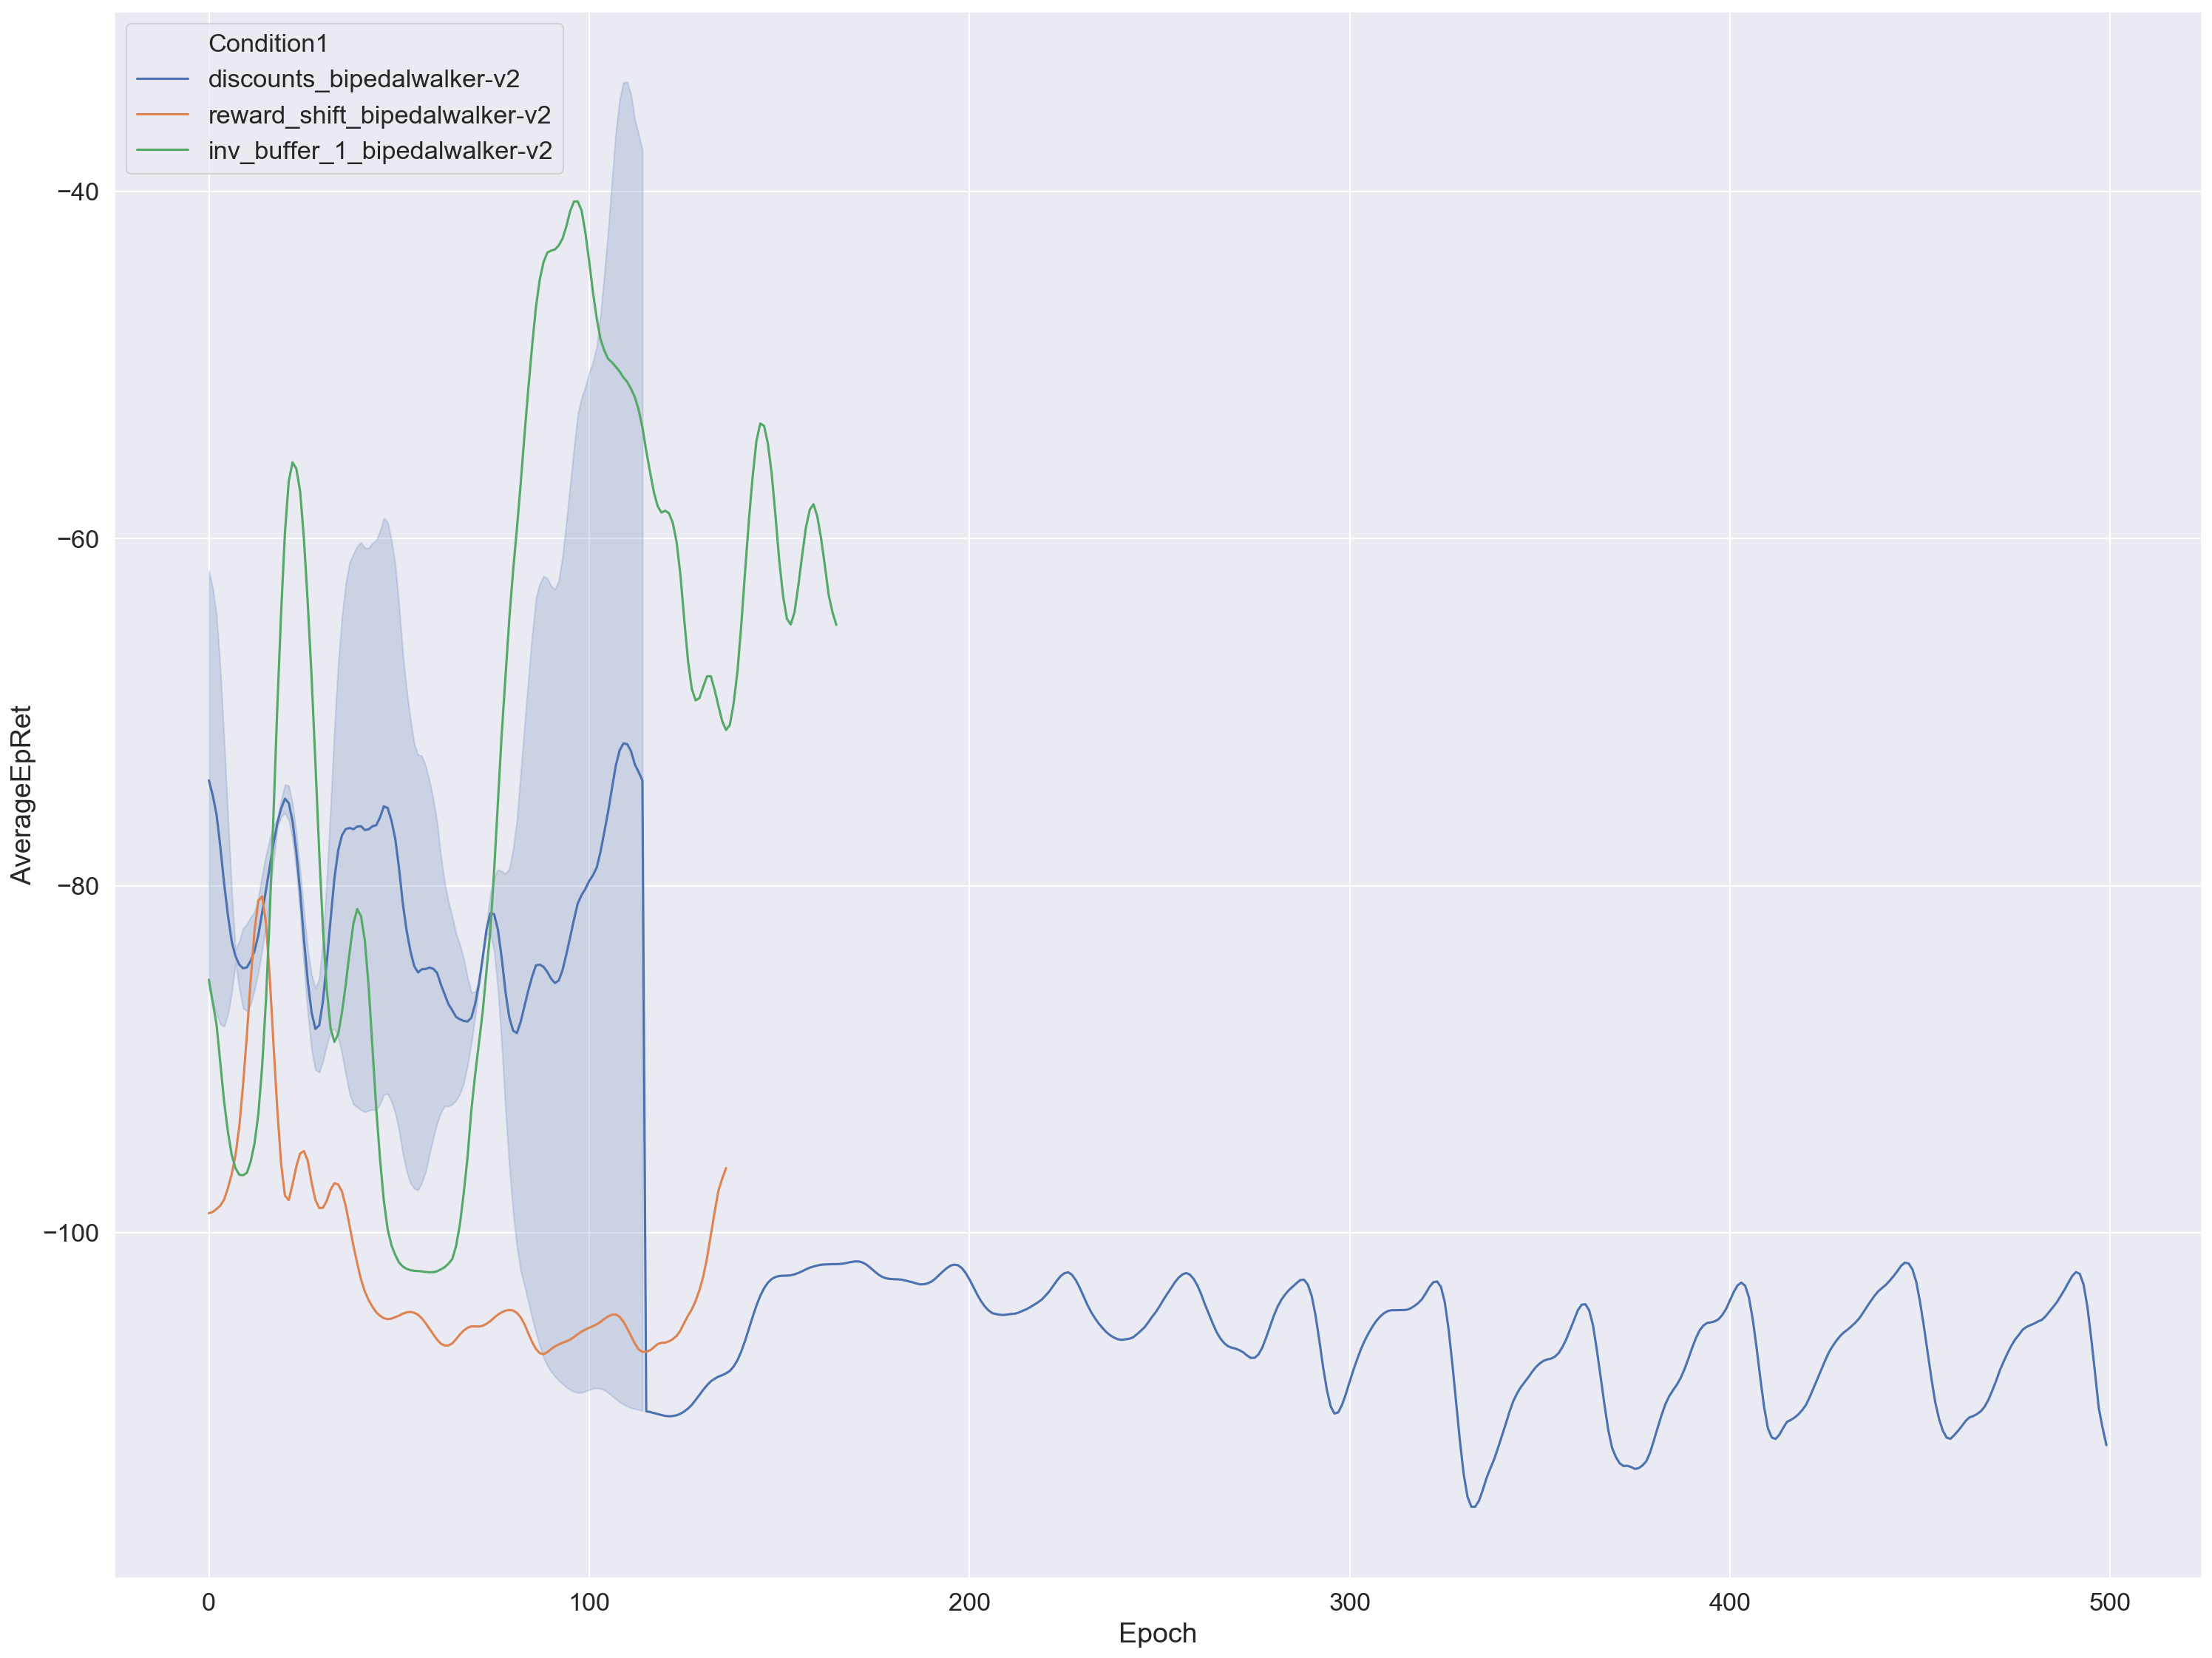

In [14]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5)
plt.show()

/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


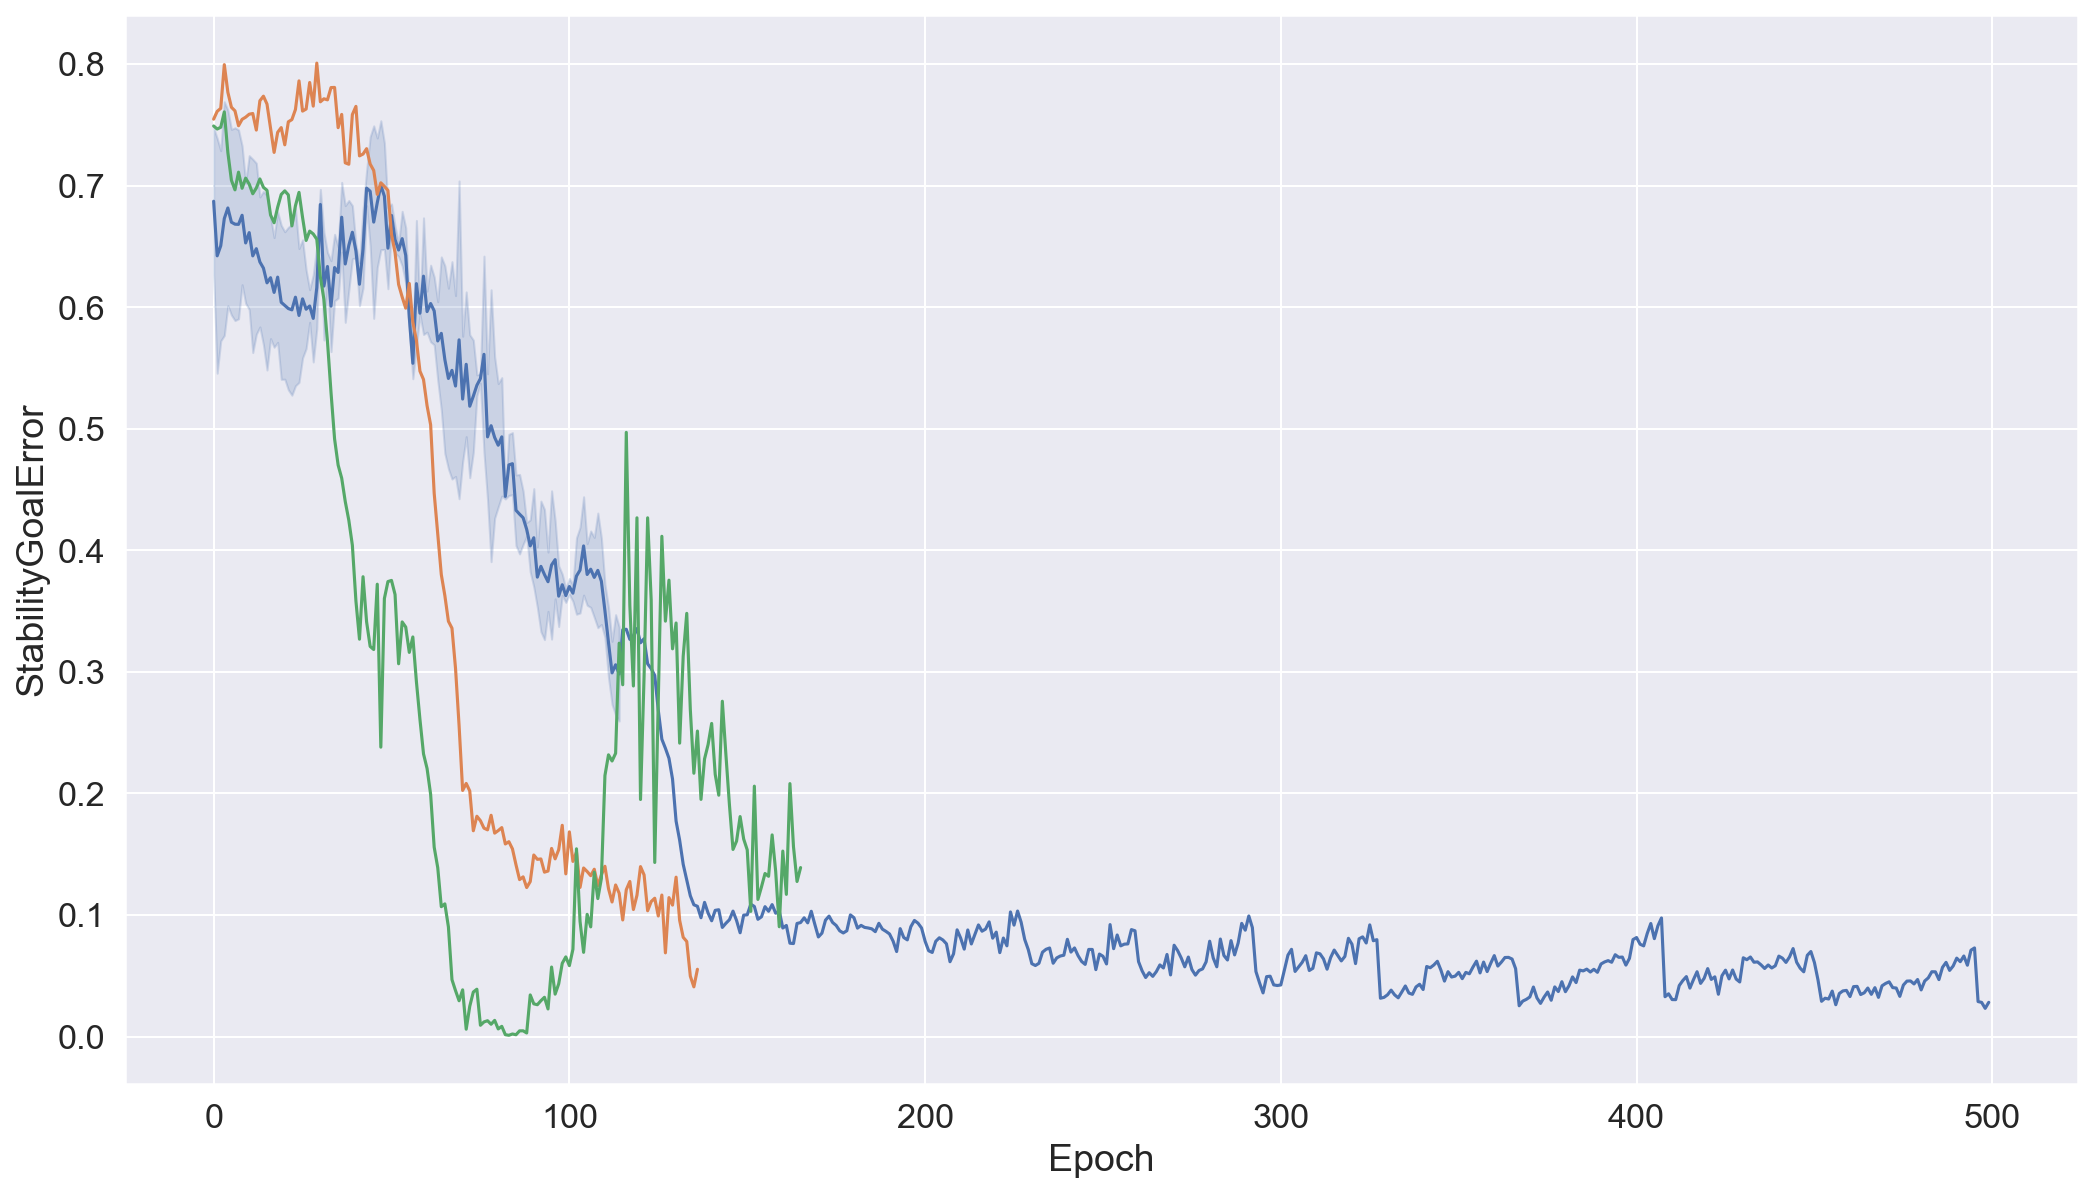

In [8]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

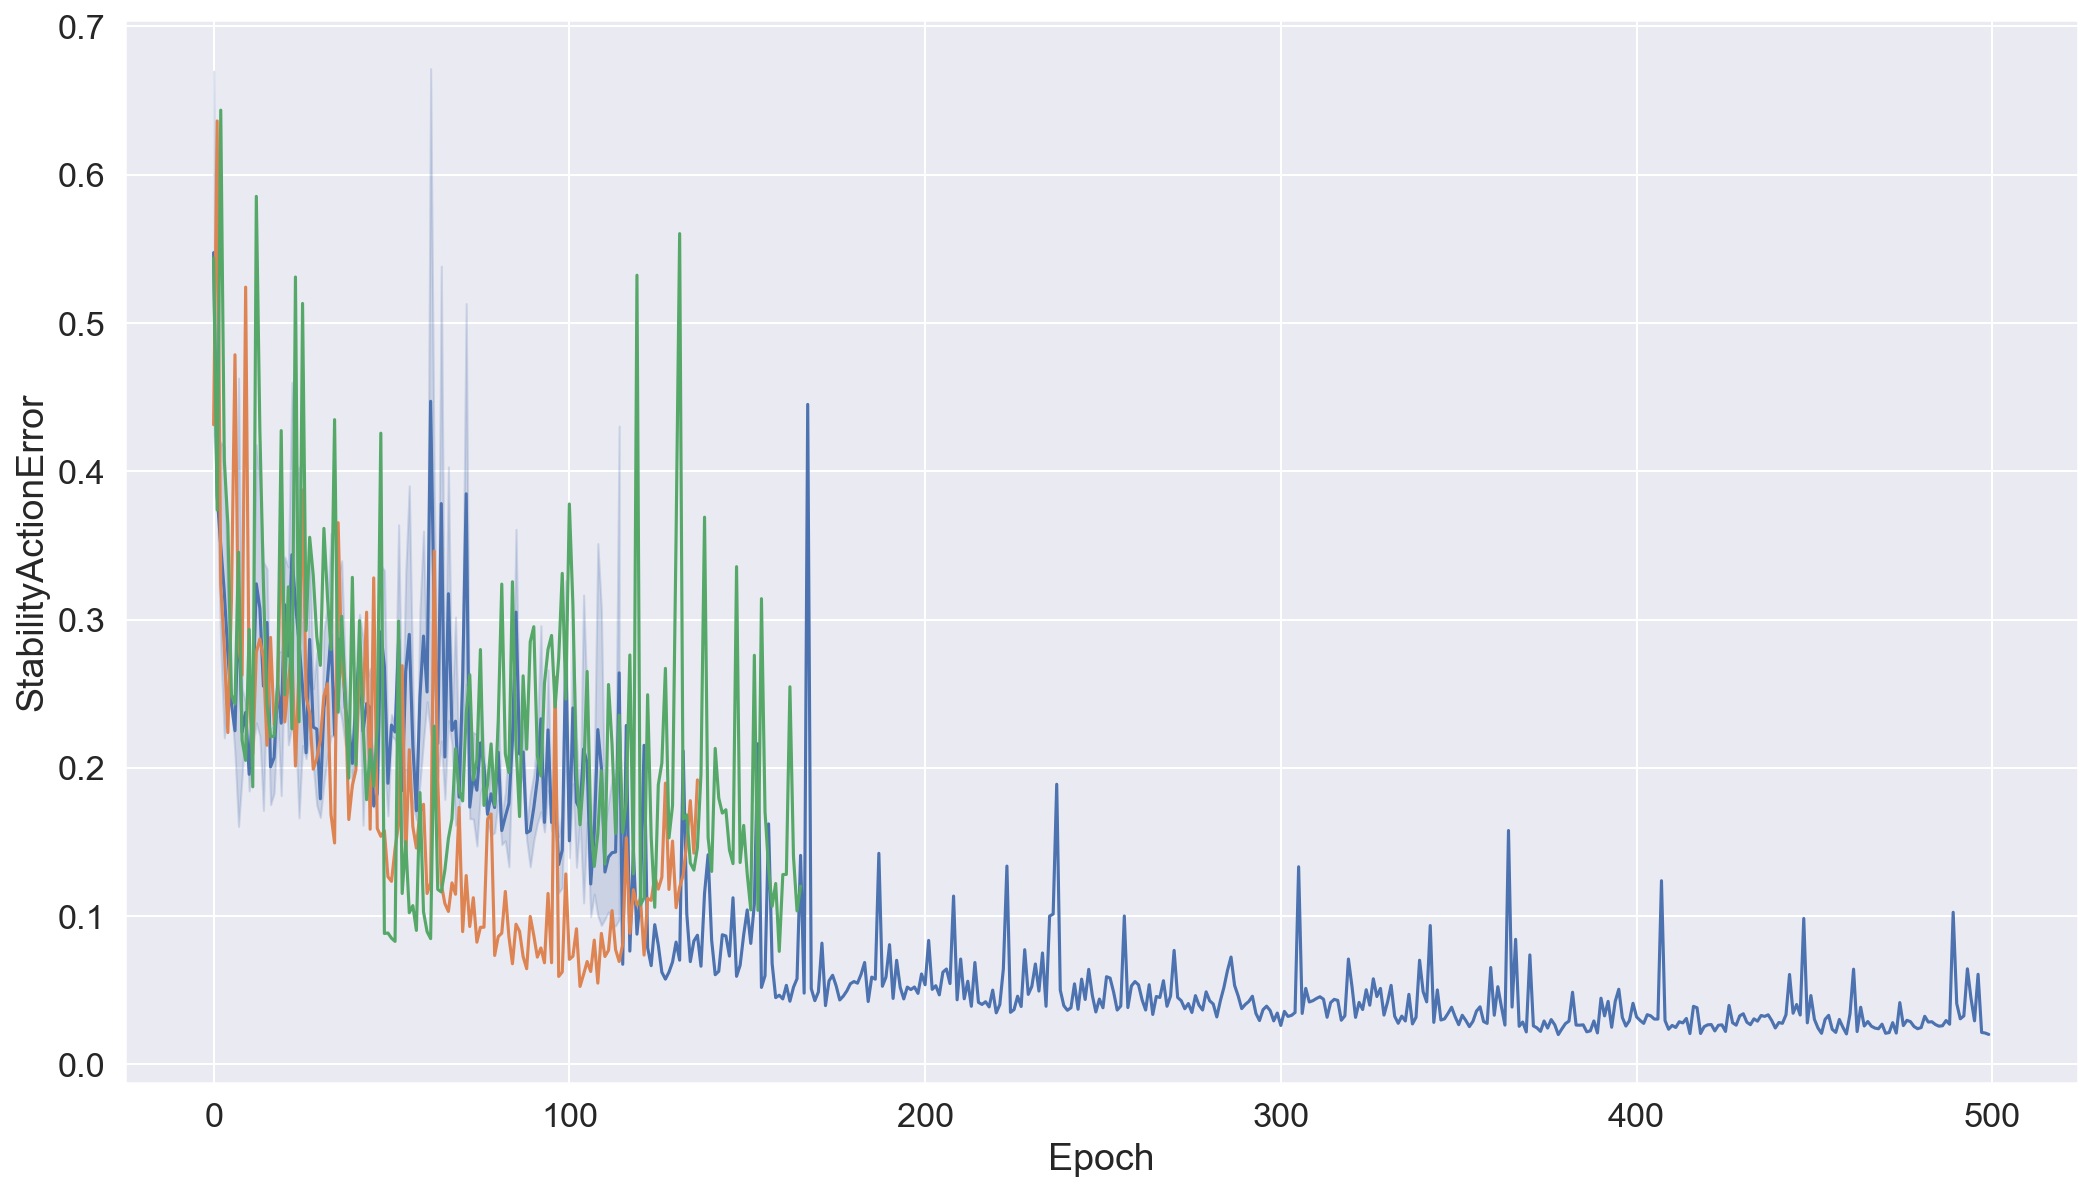

In [9]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

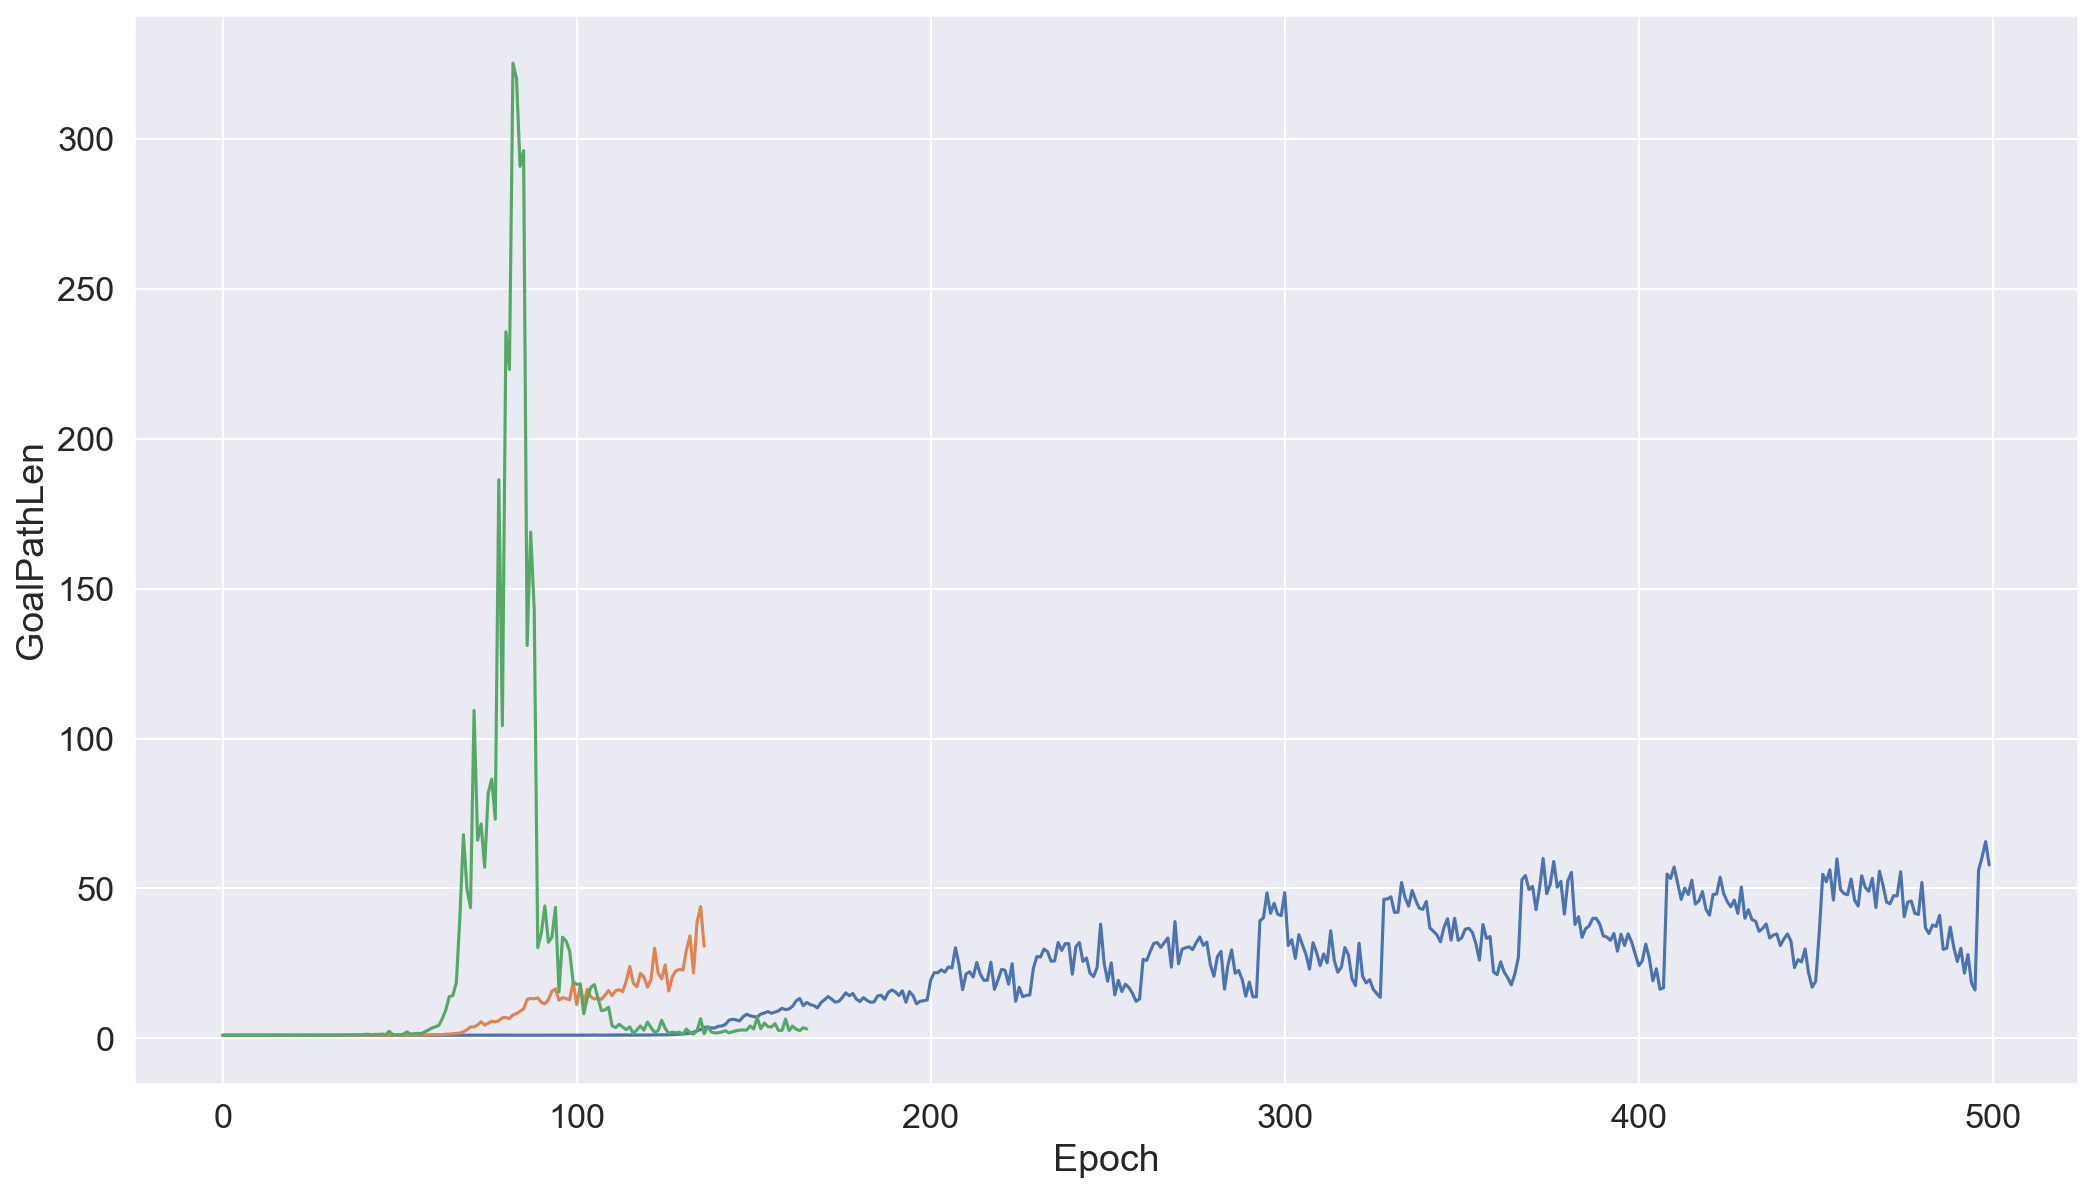

In [12]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()

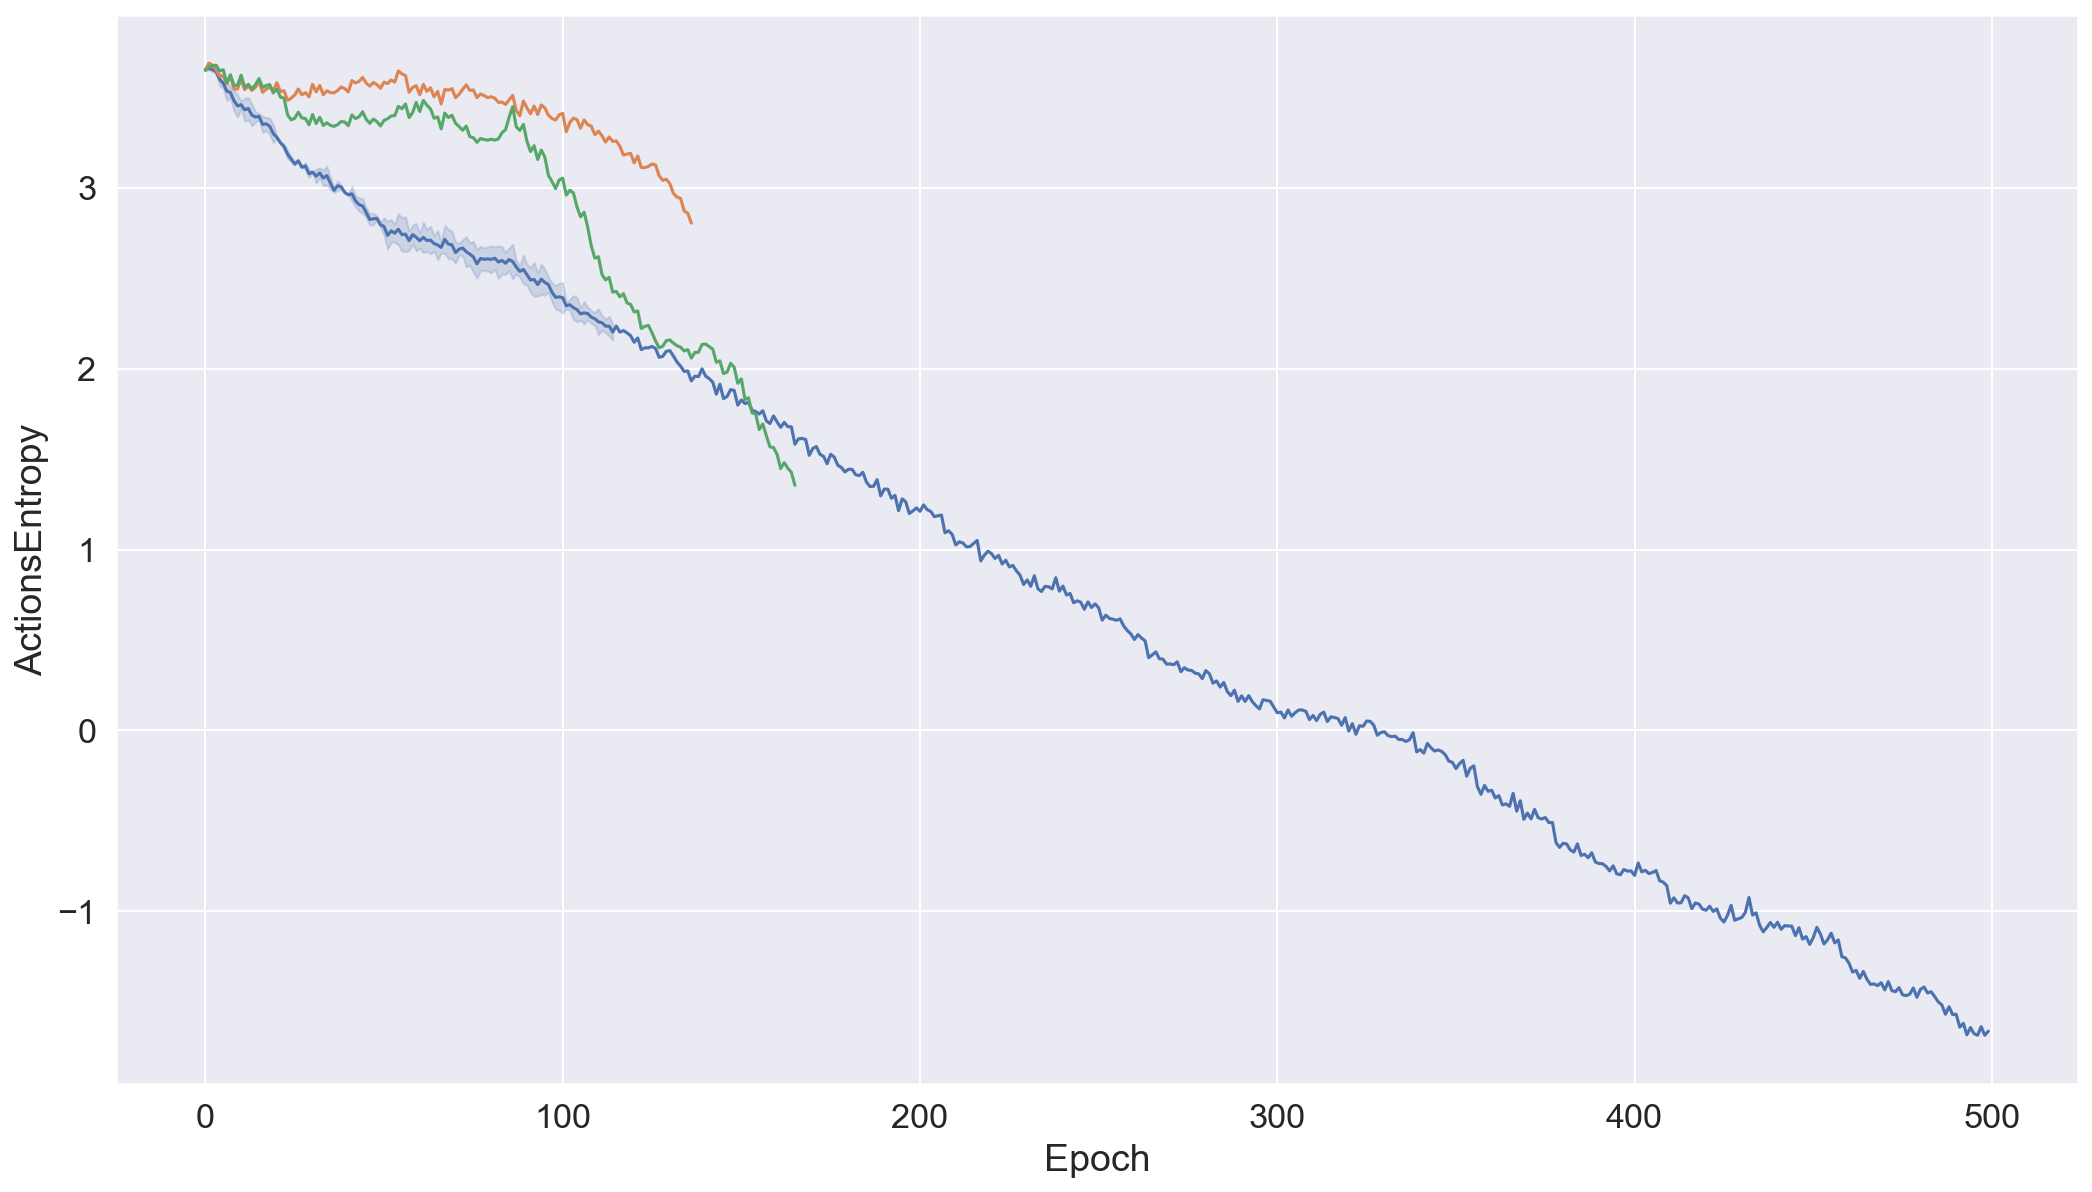

In [11]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

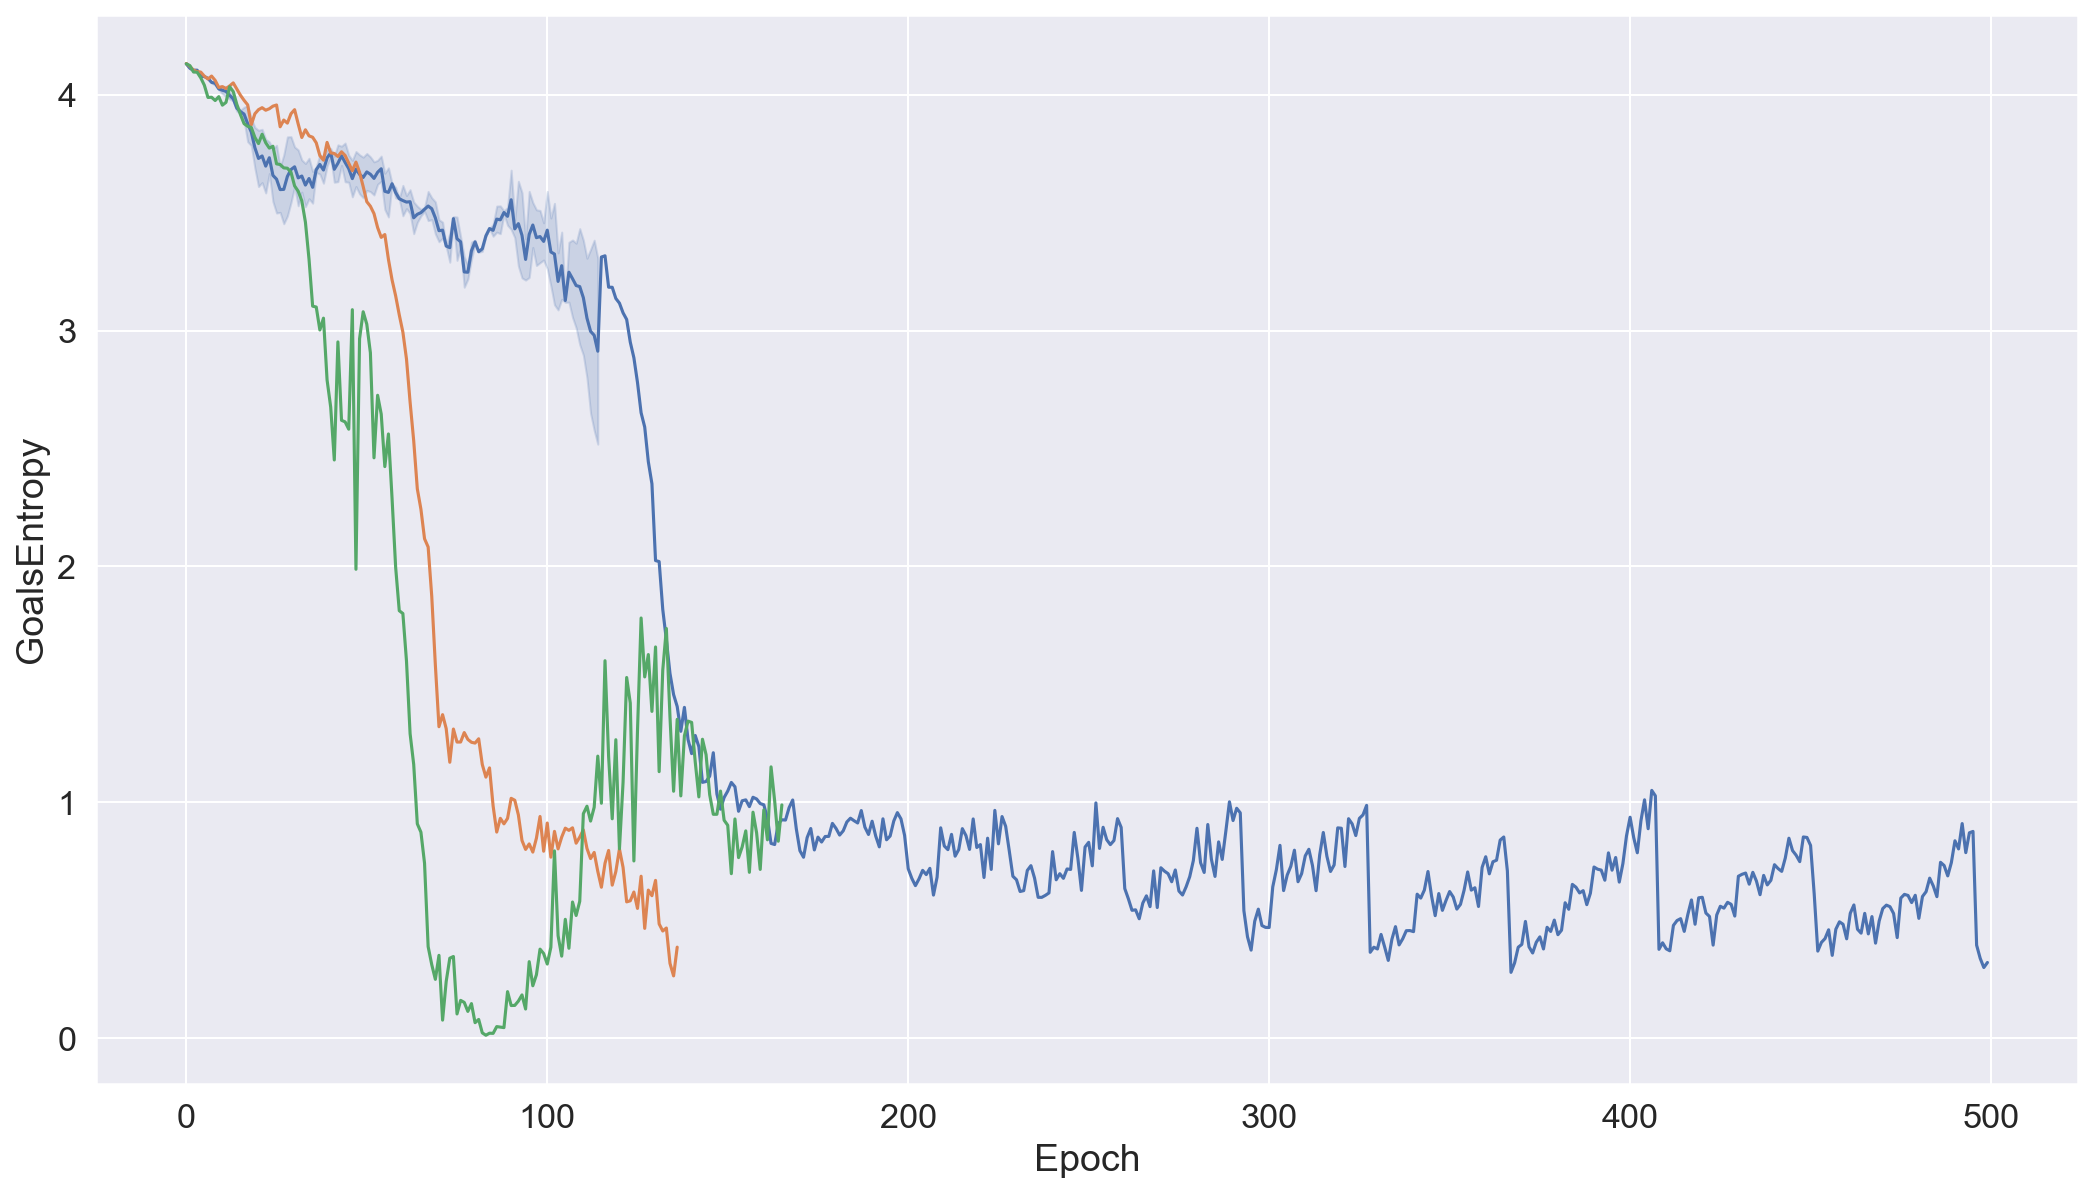

In [10]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()